In [1]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#importing data set
df = pd.read_csv('cleaned_data.csv')

In [3]:
#spiting dataset for Analysis
#preparing featrure and target Variable

x = df.drop(columns=['attrition'])
y = df['attrition']

In [13]:
#coverting all categorical data to numerrical
x = pd.get_dummies(x, drop_first=True)
feature_names = x.columns
print(x.dtypes)

employee_id                          int64
age                                  int64
years_at_company                     int64
monthly_income                       int64
work-life_balance                    int64
job_satisfaction                     int64
performance_rating                   int64
number_of_promotions                 int64
distance_from_home                   int64
number_of_dependents                 int64
company_tenure                       int64
company_reputation                   int64
employee_recognition                 int64
gender_Male                           bool
job_role_Finance                      bool
job_role_Healthcare                   bool
job_role_Media                        bool
job_role_Technology                   bool
overtime_Yes                          bool
education_level_Bachelor’s Degree     bool
education_level_High School           bool
education_level_Master’s Degree       bool
education_level_PhD                   bool
marital_sta

In [ ]:
#changing bool to Array
x = x.astype(int)

#Spliting dataframe fot train tests
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=27)
#0.3 mean 70/30 split of dataframe and  27 is random number

In [ ]:

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
#seting explainer
explainer = shap.Explainer(model, x_test)
shap_values = explainer(x_test)

100%|===================| 8936/8940 [08:02<00:00]        

In [ ]:
#Matching Shap values

print(f"x_test.shape: {x_test.shape}")
print(f"shap_values[0].shape: {shap_values[0].shape}")
print(f"shap_values[1].shape: {shap_values[1].shape}")


x_test.shape: (4470, 32)
shap_values[0].shape: (32, 2)
shap_values[1].shape: (32, 2)


In [ ]:
#setting auto trimming for shap baises
shap_values_corrected = shap_values[1]
if shap_values_corrected.shape[1] > x_test.shape[1]:
    shap_values_corrected = shap_values_corrected[:, :-1]

<Figure size 640x480 with 0 Axes>

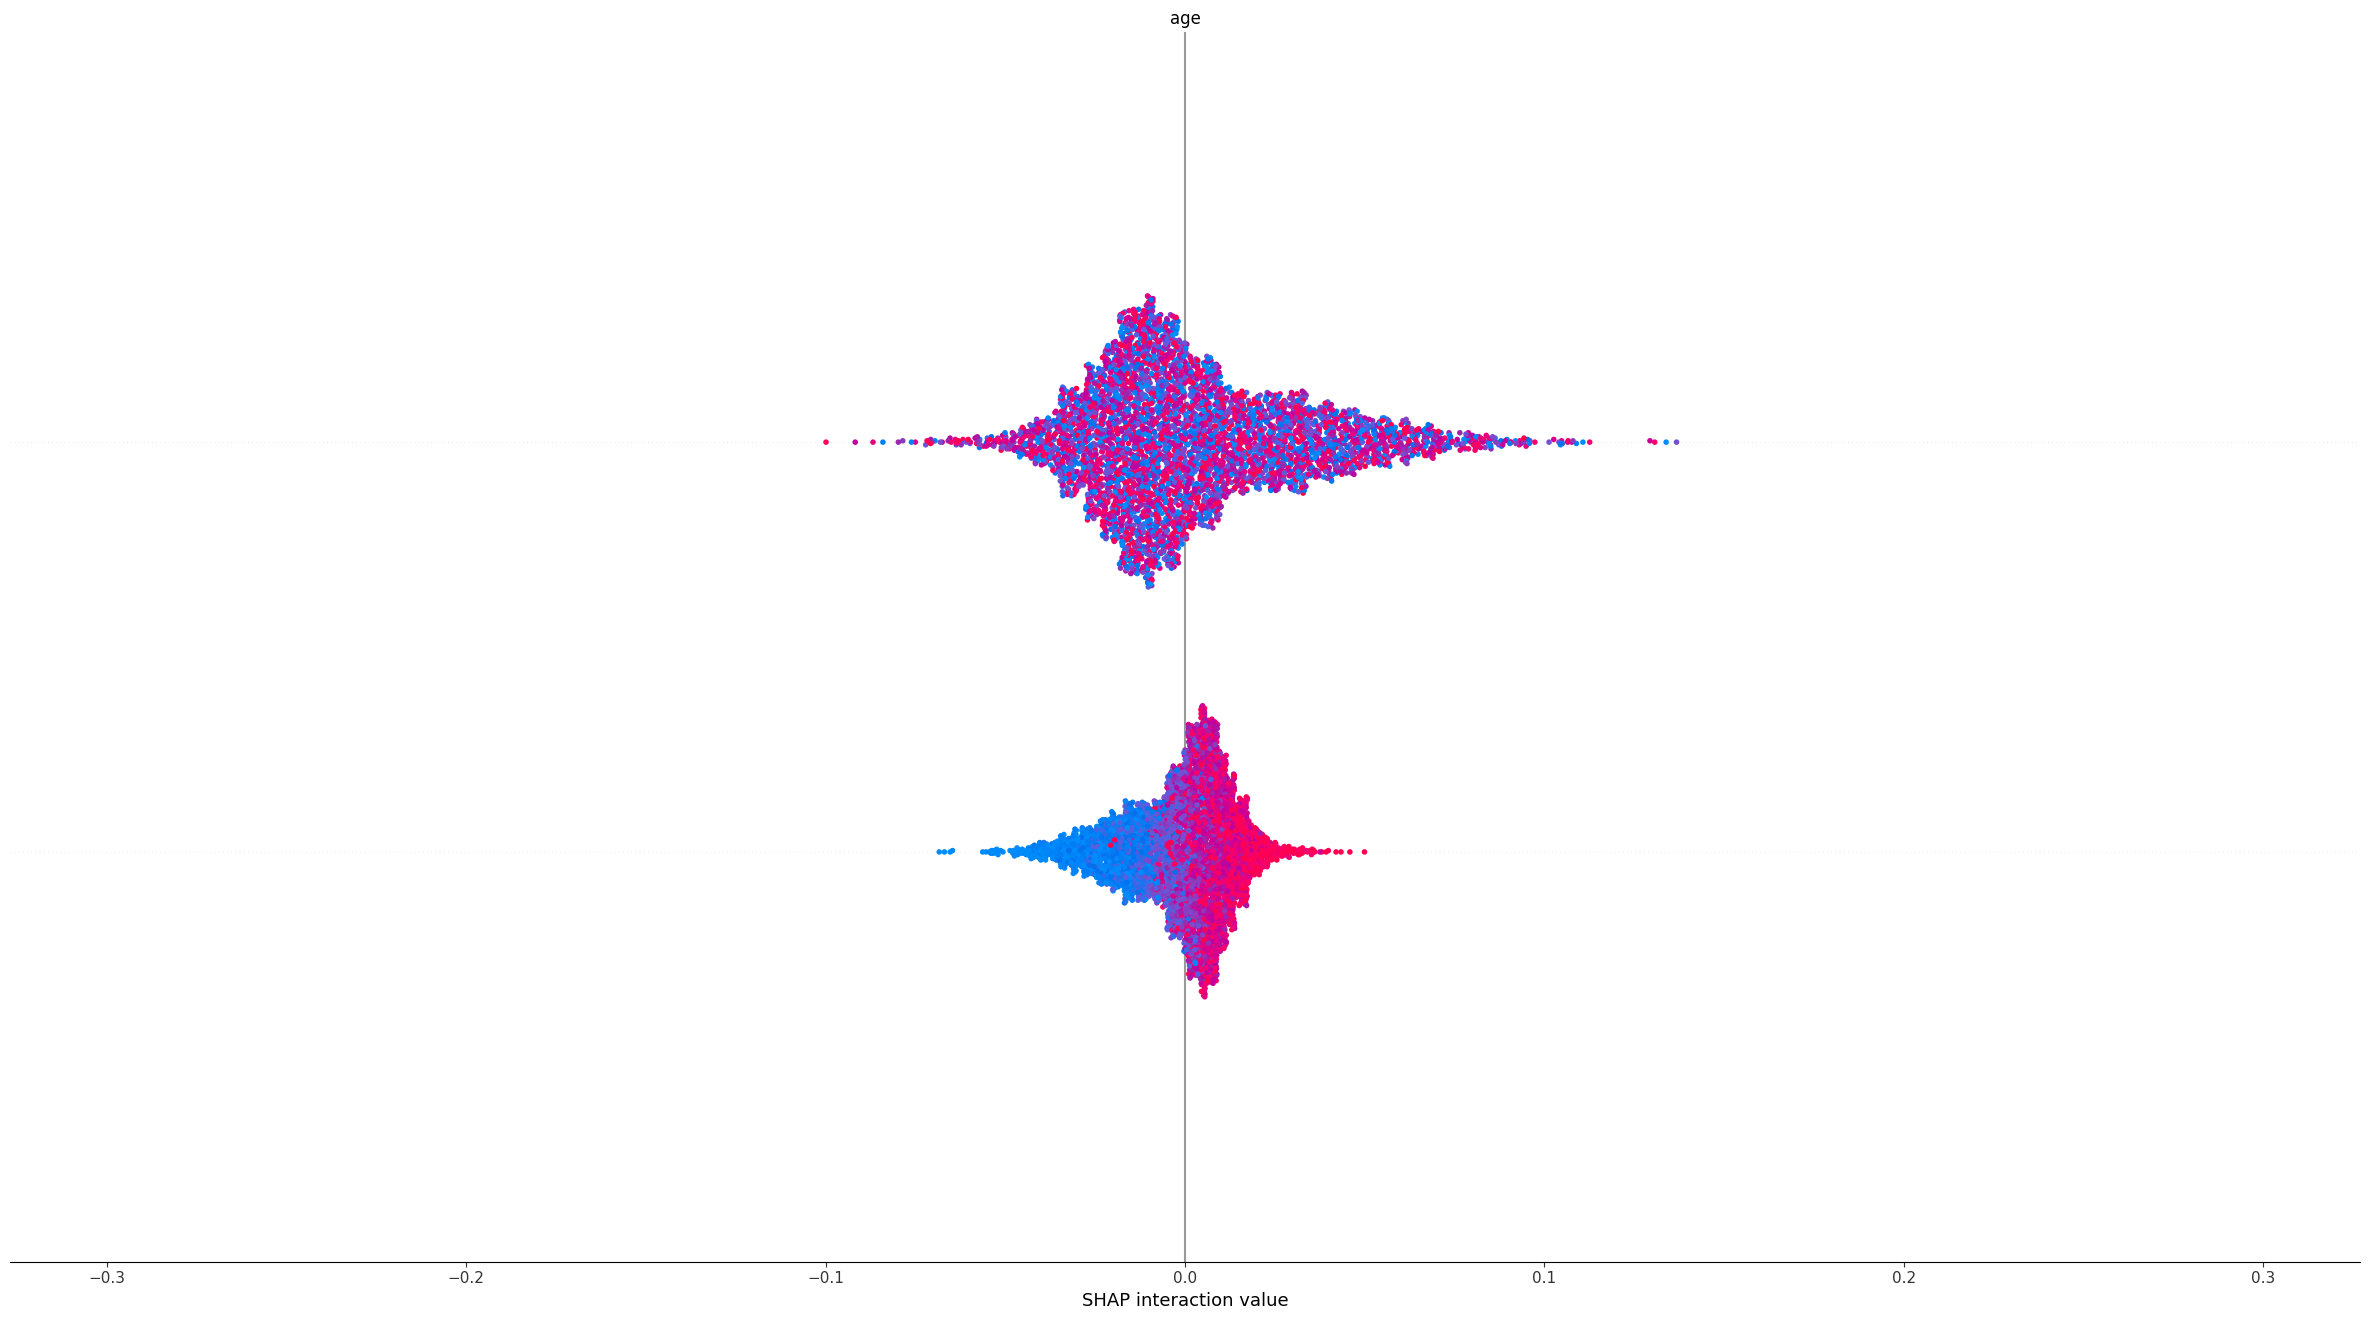

In [37]:
#Plot summary Attration according to age

#shap.summary_plot(shap_values, x_test)
shap.summary_plot(shap_values.values, x_test, max_display=15, plot_type="dot")
